Standardization (Z-Score Scaling) — Complete Notebook

Problem Statement (Why do we need Standardization?)

In real-world datasets, features often have different scales.

Example:

Age → 18 to 60

Salary → 10,000 to 1,000,000

⚠️ Problem:

ML models think larger numbers = more important

Distance-based and gradient-based models behave badly

👉 Solution: Standardization

What is Standardization?

Standardization rescales data so that:

Mean = 0

Standard Deviation = 1

After standardization:

Values show how far they are from the mean

Measured in standard deviation units

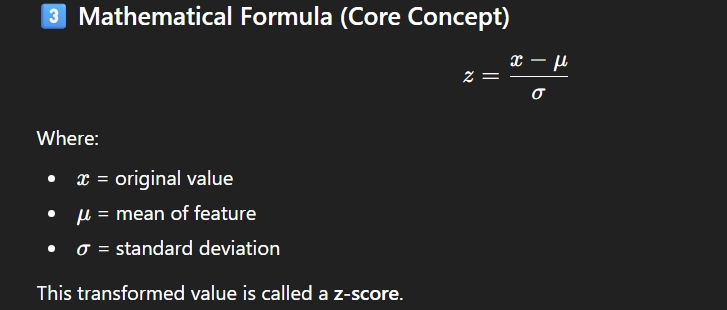

In [27]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/std1.jpeg"))


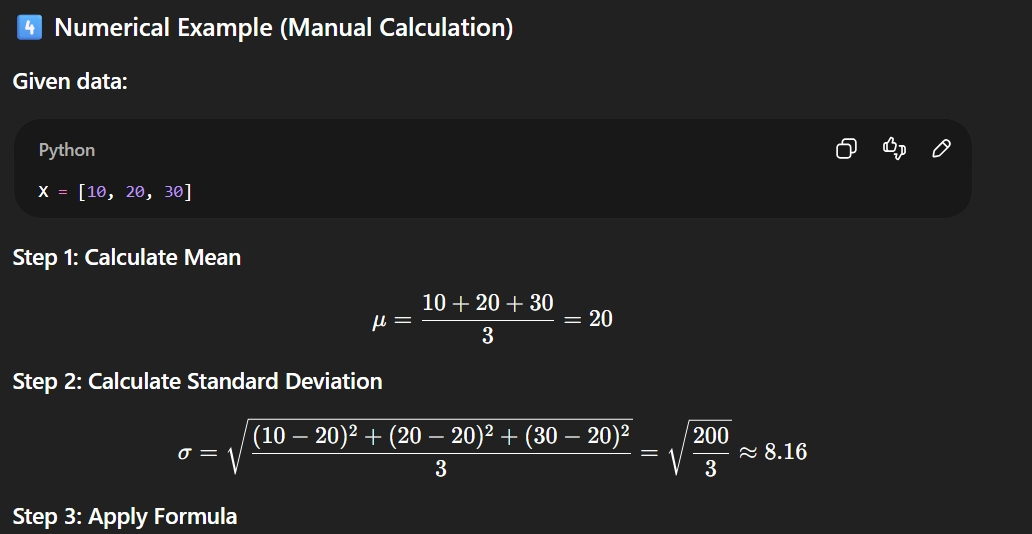

In [28]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/std2.jpeg"))


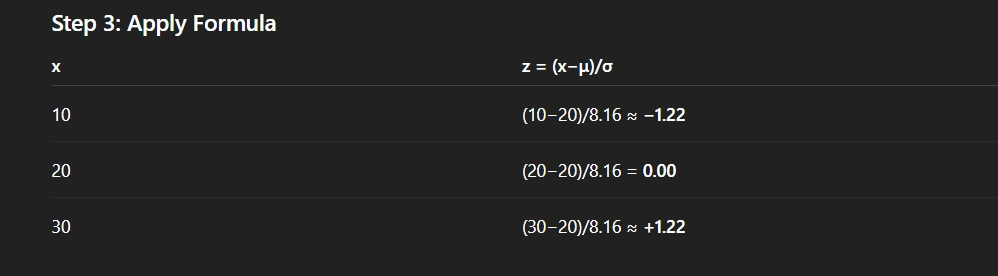

In [30]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="images/st3.jpeg"))


Important Observation

After standardization:

Mean ≈ 0

Std ≈ 1

Values can be negative or positive

Units are removed (unit-free data)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

Standardization on Titanic Dataset (Scikit-Learn)

Problem Statement

The Titanic dataset contains numerical features with very different scales:

Age → 0–80

Fare → 0–512

Pclass → 1–3

⚠️ If we train ML models directly:

Features with large values dominate

Distance & gradient-based models perform poorly

👉 We need standardization

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Titanic_cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
num_features = ['Age', 'Fare']
X= df[num_features]

In [7]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,65.6344
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [8]:
X.isnull().sum()

Age     0
Fare    0
dtype: int64

In [9]:
X.mean()

Age     29.039282
Fare    24.046813
dtype: float64

In [10]:
X.var()

Age     145.734972
Fare    419.496943
dtype: float64

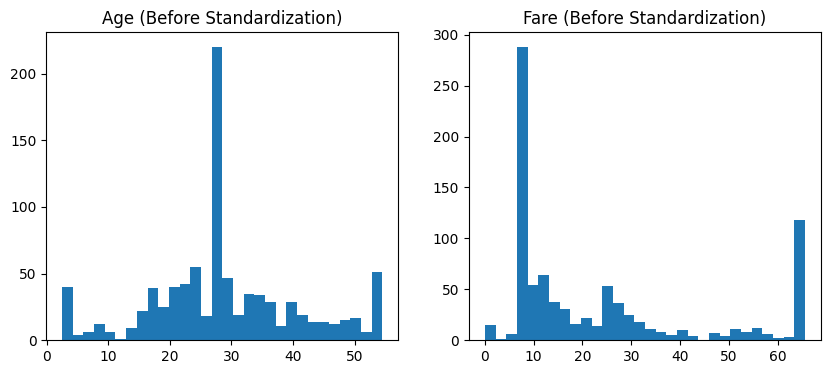

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X['Age'], bins=30)
plt.title("Age (Before Standardization)")

plt.subplot(1,2,2)
plt.hist(X['Fare'], bins=30)
plt.title("Fare (Before Standardization)")

plt.show()

In [15]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [23]:
X_std = pd.DataFrame(X_std, columns=X.columns)

In [24]:
X_std.mean()

Age     2.392400e-17
Fare    9.968332e-17
dtype: float64

6.03×10−17=0.0000000000000000603

In [25]:
X_std.var()

Age     1.001124
Fare    1.001124
dtype: float64

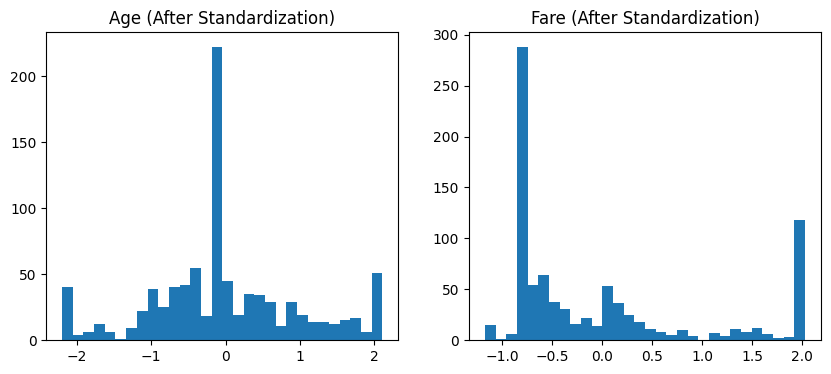

In [26]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_std['Age'], bins=30)
plt.title("Age (After Standardization)")

plt.subplot(1,2,2)
plt.hist(X_std['Fare'], bins=30)
plt.title("Fare (After Standardization)")

plt.show()

No — standardization does NOT change the shape of the data

Feature	Effect
Mean=0	Data centered → algorithms converge faster, values easy to interpret relative to average
Mean=0 + Std=1 → stable, fair, and interpretable data, perfect for ML models.

when to use standarization
When to use:

Algorithms that assume Gaussian distribution:

Linear regression, logistic regression, LDA, PCA

Algorithms sensitive to feature scale but not necessarily bounded scale:

Support Vector Machines (SVM), K-Means clustering

When outliers are present:

Standardization is less sensitive than normalization in preserving relative distances

when to use a Normalization 
When to use:

Algorithms that use distance metrics (Euclidean distance, Manhattan distance):

K-Nearest Neighbors (KNN), K-Means clustering, neural networks

When features have different ranges and you want them in the same scale

When you need values bounded in a fixed range

Activation functions in neural networks (like Sigmoid or Tanh)

Example:

Pixel values of an image (0–255) need to be scaled to [0,1] before feeding to a neural network.